In [421]:
import pandas as pd
import numpy as np

##  Breast Cancer data set configirations: 

In [422]:
df = pd.read_csv('dataR2.csv')   # loading the data set in to the pandas dataframe.
df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [423]:
print("dataSet shape: ", df.shape)
print("dataset class labels: ", df['Classification'].unique())

dataSet shape:  (116, 10)
dataset class labels:  [1 2]


## Dataset preprocessing:

In [424]:
# df = df.sample(frac = 1)    
# df
# suffeling the dataset.
df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
print("after suffeling the data set:\n")
df.head(10)

after suffeling the data set:



,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,75,25.700000,94,8.079,1.873251,65.9260,3.741220,4.49685,206.802,1
1,38,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020,1
2,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
3,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2
4,45,23.140496,116,4.902,1.402626,17.9973,4.294705,5.26330,518.586,2
5,45,29.384757,90,4.713,1.046286,23.8479,6.644245,15.55625,621.273,2
6,49,29.777778,70,8.396,1.449709,51.3387,10.731740,20.76801,602.486,2
7,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440,2
8,64,34.529723,95,4.427,1.037394,21.2117,5.462620,6.70188,252.449,1
9,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2


### Sepreating class labels and features:

In [425]:
from sklearn import preprocessing

y = df['Classification']    # y is vector contaning the class labels.

# extracting features of the problem(Matrix of features). (deleting the class label values)
X = df.drop('Classification', axis = 1)  
# replacing class label values.
y = y.replace({1:0, 2:1})    # -> 1 => cancer , 0 => healthy

### Normalizing dataset:

In [426]:
# normilizing the dataset values.
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,0.784615,0.362714,0.241135,0.100789,0.057188,0.716712,0.057311,0.016312,0.097398
1,0.215385,0.245933,0.106383,0.059792,0.024499,0.127360,0.447834,0.077830,0.072115
2,0.800000,0.268695,0.411348,0.072071,0.057593,0.000000,0.318692,0.024011,0.142110
3,0.738462,0.357271,0.156028,0.006925,0.004189,0.240191,0.882091,0.000761,0.209741
4,0.323077,0.236061,0.397163,0.044085,0.038043,0.159200,0.072523,0.026027,0.286061
5,0.323077,0.545049,0.212766,0.040712,0.023548,0.227255,0.137099,0.156500,0.348197
6,0.384615,0.564497,0.070922,0.106447,0.039959,0.547031,0.249443,0.222563,0.336829
7,0.369231,0.637347,0.985816,0.173663,0.223835,0.160760,0.067285,0.639128,1.000000
8,0.615385,0.799640,0.248227,0.035607,0.023186,0.196591,0.104623,0.044263,0.125019
9,0.215385,0.204349,0.248227,0.050493,0.031136,0.048006,0.085639,0.158779,0.092710


### Creating train and test sets:

In [427]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

#y_test_bin = y_test.replace({1 : 0, 2 : 1}, inplace = False).to_numpy()   # -> 1 => cancer , 0 => healthy
# y_test_MinusPlusOne = y_test.replace({1 : -1, 2 : 1}, inplace = False).to_numpy()  # -> 1 => cancer , -1 => healthy
#y_train_bin = y_train.replace({1 : 0, 2 : 1}, inplace = False).to_numpy()
# y_train_MinusPlusOne = y_train.replace({1 : -1, 2 : 1}, inplace = False).to_numpy() 

y_train_bin = y_train.to_numpy()
y_test_bin = y_test.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print(X_train[:10, :])     # printing 10 first records of train features matrix.


[[0.15384615 0.67322368 0.19148936 0.03744556 0.0205317  0.28427922
  0.1645433  0.03062391 0.31885572]
 [0.95384615 0.43594959 0.55319149 0.31195117 0.25668033 1.
  0.34229295 0.0144505  0.02677422]
 [0.8        0.43693926 0.24113475 0.20771757 0.11369495 0.36734172
  0.21137352 0.06598555 0.20052318]
 [0.64615385 0.6367828  0.15602837 0.03121653 0.01538743 0.13858135
  0.07176469 0.00103625 0.3562629 ]
 [0.15384615 0.15339883 0.12765957 0.0185086  0.00813682 0.11933371
  0.31480833 0.04702751 0.18683139]
 [0.64615385 0.64707294 0.21276596 0.12159991 0.06447487 0.48449325
  0.23909534 0.25569654 0.63915583]
 [1.         0.21426353 0.12056738 0.04030128 0.01722246 0.03085996
  0.10812025 0.12328686 0.73232615]
 [0.07692308 0.68785956 0.17021277 0.06029128 0.02995669 0.48050576
  0.12515439 0.27117886 0.51987145]
 [0.64615385 0.46168101 0.21276596 0.06443207 0.03554968 0.23886517
  0.16479877 0.04430473 0.10894187]
 [0.24615385 0.6168875  0.4822695  0.70432641 0.51905619 0.31089695
  0.

## Logistic Regression on Cancer data set:

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(X_train, y_train_bin)

LogisticRegression()

In [429]:
logistic_train_score = logisticRegression_model.score(X_train, y_train_bin)
print('logistic train score: ', logistic_train_score)

logistic train score:  0.7283950617283951


In [430]:
#Predict the response for test dataset
y_pred = logisticRegression_model.predict(X_test)    # predict using test data.
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [431]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for logistic regression : \n", report)

Confusion Matrix for test : 
 [[ 6 10]
 [ 3 16]]

classification for logistic regression : 
               precision    recall  f1-score   support

           0       0.67      0.38      0.48        16
           1       0.62      0.84      0.71        19

    accuracy                           0.63        35
   macro avg       0.64      0.61      0.60        35
weighted avg       0.64      0.63      0.61        35



In [432]:
logistic_test_score = logisticRegression_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('logistic test score: ', logistic_test_score)

logistic test score:  0.6285714285714286


## SVM with linear kernel on Cancer data:

In [433]:
from sklearn import svm

SVM_linearKernel_model = svm.SVC(kernel='linear')
SVM_linearKernel_model.fit(X_train, y_train_bin)

SVM_linearKernel_train_score = SVM_linearKernel_model.score(X_train, y_train_bin)
print('SVM(linear kernel) train score: ', SVM_linearKernel_train_score)

SVM(linear kernel) train score:  0.7037037037037037


In [434]:
#Predict the response for test dataset
y_pred = SVM_linearKernel_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [435]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for SVM(linear kernel) : \n", report)

Confusion Matrix for test : 
 [[ 7  9]
 [ 3 16]]

classification for SVM(linear kernel) : 
               precision    recall  f1-score   support

           0       0.70      0.44      0.54        16
           1       0.64      0.84      0.73        19

    accuracy                           0.66        35
   macro avg       0.67      0.64      0.63        35
weighted avg       0.67      0.66      0.64        35



In [436]:
SVM_linearKernel_test_score = SVM_linearKernel_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('SVM(linear kernel) test score: ', SVM_linearKernel_test_score)

SVM(linear kernel) test score:  0.6571428571428571


## SVM with RBF kernel on Cancer data:

In [437]:
SVM_RBFKernel_model = svm.SVC(kernel='rbf')
SVM_RBFKernel_model.fit(X_train, y_train_bin)

SVM_RBFKernel_train_score = SVM_RBFKernel_model.score(X_train, y_train_bin)
print('SVM(RBF kernel) train score: ', SVM_RBFKernel_train_score)

SVM(RBF kernel) train score:  0.8641975308641975


In [438]:
#Predict the response for test dataset
y_pred = SVM_RBFKernel_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [439]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for SVM(RBF kernel) : \n", report)

Confusion Matrix for test : 
 [[15  1]
 [ 4 15]]

classification for SVM(RBF kernel) : 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.79      0.86        19

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.87      0.86      0.86        35



In [440]:
SVM_RBFKernel_test_score = SVM_RBFKernel_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('SVM(RBF kernel) test score: ', SVM_RBFKernel_test_score)

SVM(RBF kernel) test score:  0.8571428571428571


## Decision Tree on Cancer data:

In [441]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_model = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
DecisionTree_model.fit(X_train, y_train_bin)

DecisionTree_model_train_score = DecisionTree_model.score(X_train, y_train_bin)
print('DecisionTree train score: ', DecisionTree_model_train_score)


DecisionTree train score:  1.0


In [442]:
#Predict the response for test dataset
y_pred = DecisionTree_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [443]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print("Confusion Matrix for test : \n", cm)
print("\nclassification for DecisionTree : \n", report)

Confusion Matrix for test : 
 [[12  4]
 [ 5 14]]

classification for DecisionTree : 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.78      0.74      0.76        19

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



In [444]:
DecisionTree_test_score = DecisionTree_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('DecisionTree test score: ', DecisionTree_test_score)

DecisionTree test score:  0.7428571428571429


## Visualizing Decision Tree:

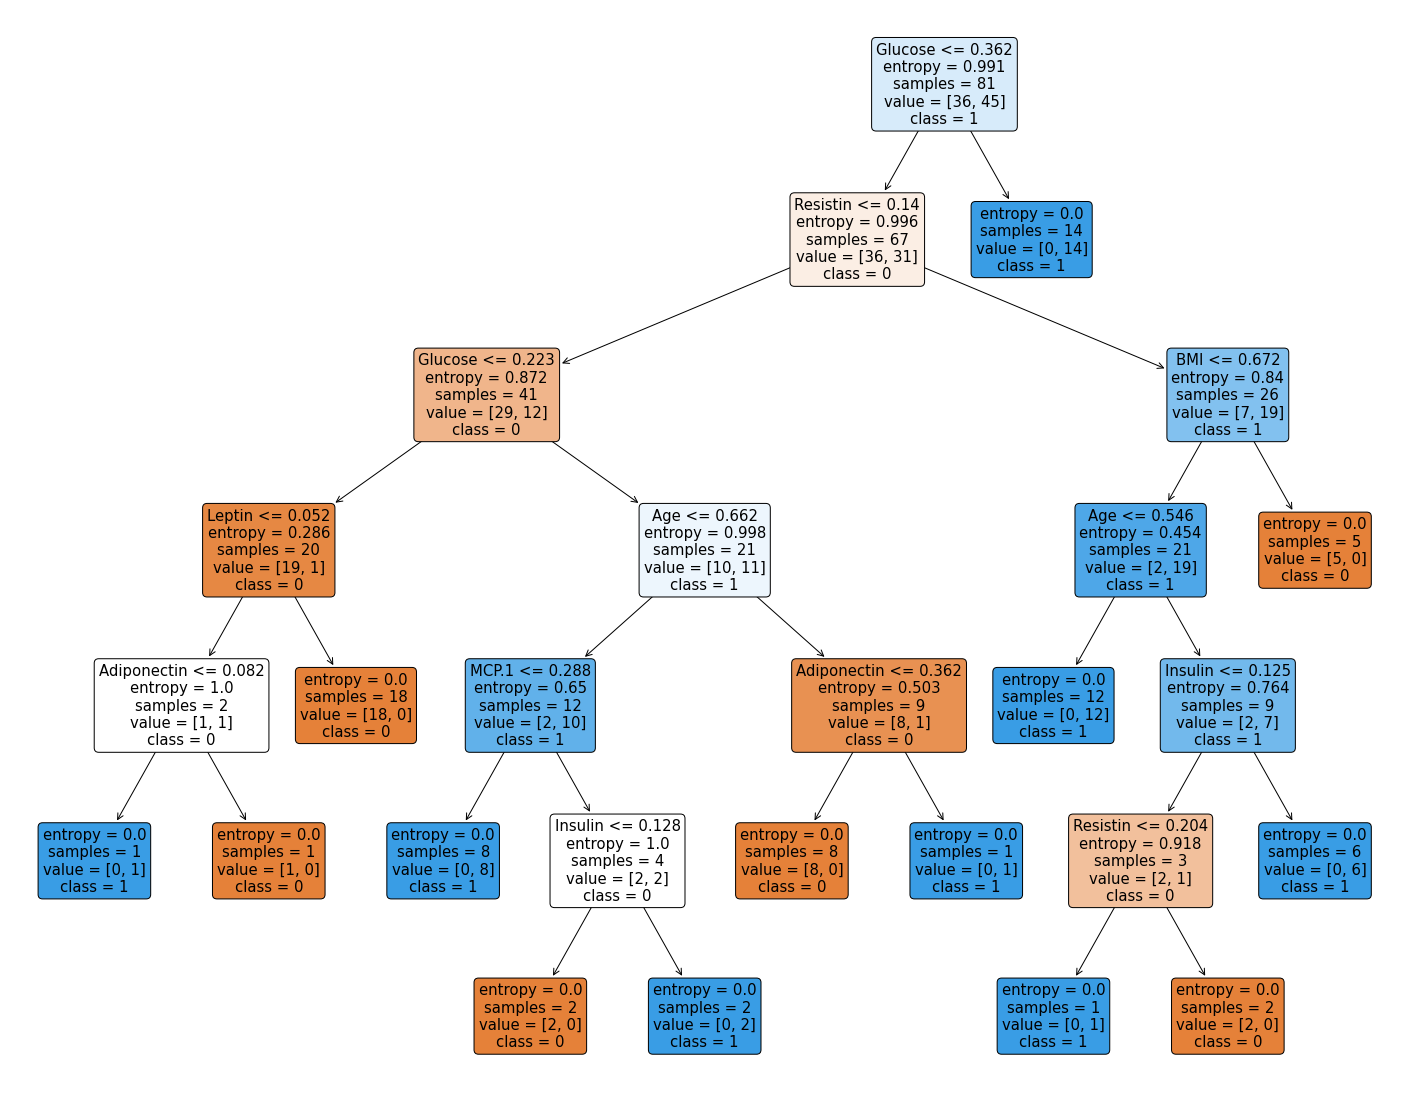

In [445]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTree_model, 
                   feature_names=names,  
                   class_names=['0', '1'],
                   filled=True, rounded=True)

## KNN on Cancer data:

In [446]:
from sklearn.neighbors import KNeighborsClassifier

# we want to test some k values for knn model and select best of them according to the results.
k_range = range(1, 26)
test_scores_k = {}
train_scores_k = {}

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train_bin)
    train_scores_k[k] = knn_model.score(X_train, y_train_bin)
    y_pred = knn_model.predict(X_test)
    test_scores_k[k] = knn_model.score(X_test, y_test_bin)
    
print("result in train data according to k : \n")
train_scores_k


result in train data according to k : 



{1: 1.0,
 2: 0.8024691358024691,
 3: 0.7901234567901234,
 4: 0.7037037037037037,
 5: 0.8148148148148148,
 6: 0.7901234567901234,
 7: 0.8024691358024691,
 8: 0.7901234567901234,
 9: 0.7777777777777778,
 10: 0.691358024691358,
 11: 0.7037037037037037,
 12: 0.691358024691358,
 13: 0.6666666666666666,
 14: 0.7037037037037037,
 15: 0.691358024691358,
 16: 0.6666666666666666,
 17: 0.6666666666666666,
 18: 0.654320987654321,
 19: 0.6666666666666666,
 20: 0.654320987654321,
 21: 0.654320987654321,
 22: 0.6419753086419753,
 23: 0.6666666666666666,
 24: 0.6666666666666666,
 25: 0.6666666666666666}

In [447]:
print("result in test data according to k : \n")
test_scores_k

result in test data according to k : 



{1: 0.7142857142857143,
 2: 0.7428571428571429,
 3: 0.7142857142857143,
 4: 0.7142857142857143,
 5: 0.7428571428571429,
 6: 0.6857142857142857,
 7: 0.6857142857142857,
 8: 0.6285714285714286,
 9: 0.6857142857142857,
 10: 0.6285714285714286,
 11: 0.7428571428571429,
 12: 0.6857142857142857,
 13: 0.6285714285714286,
 14: 0.6571428571428571,
 15: 0.6285714285714286,
 16: 0.7142857142857143,
 17: 0.6285714285714286,
 18: 0.6285714285714286,
 19: 0.5714285714285714,
 20: 0.5428571428571428,
 21: 0.6,
 22: 0.6,
 23: 0.6,
 24: 0.6285714285714286,
 25: 0.6285714285714286}

[Text(0.5, 0, 'k values'), Text(0, 0.5, 'train scores')]

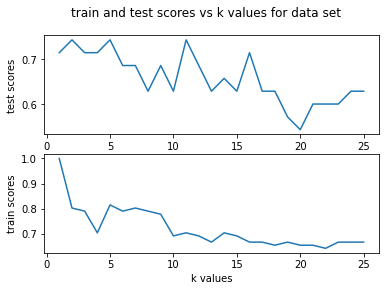

In [448]:

k_vals = list(k_range)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('train and test scores vs k values for data set')

ax1.plot(k_vals, test_scores_k.values())

ax1.set(xlabel='k values', ylabel='test scores')

ax2.plot(k_vals, train_scores_k.values())
ax2.set(xlabel='k values', ylabel='train scores')

In [449]:
# sorting the dict to find out the best k according to the plots.
sorted_testScores = {k: v for k, v in sorted(test_scores_k.items(), key=lambda item: item[1])}

best_k = list(sorted_testScores.keys())[len(sorted_testScores) - 1]

print('best k for knn is : ', best_k)
knn_model = KNeighborsClassifier(n_neighbors = best_k)    # according to plots and diffrent k values for knn we select this k.

knn_model = knn_model.fit(X_train, y_train_bin)

knn_model_train_score = knn_model.score(X_train, y_train_bin)
print('knn_model train score: ', knn_model_train_score)

best k for knn is :  11
knn_model train score:  0.7037037037037037


In [450]:
#Predict the response for test dataset
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [451]:
cm = confusion_matrix(y_test_bin, y_pred)
report = classification_report(y_test_bin, y_pred)
  
print ("Confusion Matrix for test : \n", cm)
print("\nclassification for knn model : \n", report)

Confusion Matrix for test : 
 [[12  4]
 [ 5 14]]

classification for knn model : 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.78      0.74      0.76        19

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35



In [452]:
knn = knn_model.score(X_test, y_test_bin)   # Accuracy of the test-set.
print('knn test score: ', knn)

knn test score:  0.7428571428571429


## Cross validation:

In [453]:
from sklearn.model_selection import KFold

# this variable is fixed according to the project Description.
k_split = 5

CV = KFold(n_splits = k_split, shuffle = False)
dict_scores = {'logisticRegression_model':[], 'SVM_linearKernel_model':[], 
               'SVM_RBFKernel_model':[], 'DecisionTree_model':[], 'knn_model':[]}

for train_index, test_index in CV.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]  # fold partioton.
    
    logisticRegression_model.fit(X_train, y_train)
    SVM_linearKernel_model.fit(X_train, y_train)
    SVM_RBFKernel_model.fit(X_train, y_train)
    DecisionTree_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    
    dict_scores['logisticRegression_model'].append(logisticRegression_model.score(X_test, y_test))
    dict_scores['SVM_linearKernel_model'].append(SVM_linearKernel_model.score(X_test, y_test))
    dict_scores['SVM_RBFKernel_model'].append(SVM_RBFKernel_model.score(X_test, y_test))
    dict_scores['DecisionTree_model'].append(DecisionTree_model.score(X_test, y_test))
    dict_scores['knn_model'].append(knn_model.score(X_test, y_test))

for key, value in dict_scores.items():
    print("\n")
    print(key, value) 


Train Index:  [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115] 

Test Index:  [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Train Index:  [  0   1   2   3   4   5   6 

### Comparing models using average:

In [454]:
avg_dict = {'logisticRegression_model': 0, 'SVM_linearKernel_model': 0, 
               'SVM_RBFKernel_model': 0, 'DecisionTree_model': 0, 'knn_model': 0}

for key in dict_scores.keys():
    avg_dict[key] = np.mean(dict_scores[key])

# printing the best model according to their k-fold cross validations mean.
avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1])}
avg_dict

{'logisticRegression_model': 0.6036231884057971,
 'SVM_linearKernel_model': 0.6210144927536232,
 'knn_model': 0.6644927536231885,
 'DecisionTree_model': 0.7322463768115942,
 'SVM_RBFKernel_model': 0.7423913043478261}

In [455]:
# using cross_val_score from sklearn to test the pervious results.

from sklearn.model_selection import cross_val_score

CV2 = KFold(n_splits = k_split, shuffle=False)

result = cross_val_score(logisticRegression_model , X, y, cv = CV2)
print("Avg score for logisticRegression_model : {}".format(result.mean()))

result = cross_val_score(SVM_linearKernel_model , X, y, cv = CV2)
print("Avg score for SVM_linearKernel_model : {}".format(result.mean()))

result = cross_val_score(SVM_RBFKernel_model , X, y, cv = CV2)
print("Avg score for SVM_RBFKernel_model : {}".format(result.mean()))

result = cross_val_score(DecisionTree_model , X, y, cv = CV2)
print("Avg score for DecisionTree_model : {}".format(result.mean()))

result = cross_val_score(knn_model , X, y, cv = CV2)
print("Avg score for knn_model : {}".format(result.mean()))

Avg score for logisticRegression_model : 0.6036231884057971
Avg score for SVM_linearKernel_model : 0.6210144927536232
Avg score for SVM_RBFKernel_model : 0.7423913043478261
Avg score for DecisionTree_model : 0.7583333333333334
Avg score for knn_model : 0.6644927536231885
